Installing the dependencies

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 20.9 MB/s 
     |████████████████████████████████| 9.8 MB 53.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Importing the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset

In [ ]:
train_provided=pd.read_csv("/content/drive/MyDrive/AM_Personal_Folder/time series/wallmart/train.csv (2).zip (Unzipped Files)/train.csv")

In [ ]:
train_provided

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train_provided.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**No missing values**

In [ ]:
test_provided=pd.read_csv("/content/drive/MyDrive/AM_Personal_Folder/time series/wallmart/test.csv (2).zip (Unzipped Files)/test.csv")
test_provided.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [ ]:
test_provided.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


**No missing values**

In [ ]:
train_provided['year'] = pd.DatetimeIndex(train_provided['Date']).year
train_provided['month'] = pd.DatetimeIndex(train_provided['Date']).month
train_provided['WeekofYear'] = pd.DatetimeIndex(train_provided['Date']).weekofyear
train_provided['Day'] = pd.DatetimeIndex(train_provided['Date']).day
train_provided['DayofWeek'] = pd.DatetimeIndex(train_provided['Date']).dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test_provided['year'] = pd.DatetimeIndex(test_provided['Date']).year
test_provided['month'] = pd.DatetimeIndex(test_provided['Date']).month
test_provided['WeekofYear'] = pd.DatetimeIndex(test_provided['Date']).weekofyear
test_provided['Day'] = pd.DatetimeIndex(test_provided['Date']).day
test_provided['DayofWeek'] = pd.DatetimeIndex(test_provided['Date']).dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


Loading the third dataset

In [ ]:
store=pd.read_csv("/content/drive/MyDrive/AM_Personal_Folder/time series/wallmart/stores.csv")

In [ ]:
store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


Combining the three datsets

In [ ]:
df_train=pd.merge(train_provided,store,on=['Store'],how='outer')

In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,4,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,4,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,4,A,151315
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,4,A,151315


In [ ]:
df_test=pd.merge(test_provided,store,on=['Store'],how='outer')
df_test.head()

,Store,Dept,Date,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
0,1,1,2012-11-02,False,2012,11,44,2,4,A,151315
1,1,1,2012-11-09,False,2012,11,45,9,4,A,151315
2,1,1,2012-11-16,False,2012,11,46,16,4,A,151315
3,1,1,2012-11-23,True,2012,11,47,23,4,A,151315
4,1,1,2012-11-30,False,2012,11,48,30,4,A,151315


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   year          421570 non-null  int64  
 6   month         421570 non-null  int64  
 7   WeekofYear    421570 non-null  int64  
 8   Day           421570 non-null  int64  
 9   DayofWeek     421570 non-null  int64  
 10  Type          421570 non-null  object 
 11  Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(8), object(2)
memory usage: 39.0+ MB


**No missing values**

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Store       115064 non-null  int64 
 1   Dept        115064 non-null  int64 
 2   Date        115064 non-null  object
 3   IsHoliday   115064 non-null  bool  
 4   year        115064 non-null  int64 
 5   month       115064 non-null  int64 
 6   WeekofYear  115064 non-null  int64 
 7   Day         115064 non-null  int64 
 8   DayofWeek   115064 non-null  int64 
 9   Type        115064 non-null  object
 10  Size        115064 non-null  int64 
dtypes: bool(1), int64(8), object(2)
memory usage: 9.8+ MB


**No missing values**

In [ ]:
df_train=df_train[df_train['IsHoliday']!=0]

Imputation

In [ ]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,4,A,151315
31,1,1,2010-09-10,18194.74,True,2010,9,36,10,4,A,151315
42,1,1,2010-11-26,18820.29,True,2010,11,47,26,4,A,151315
47,1,1,2010-12-31,19124.58,True,2010,12,52,31,4,A,151315
53,1,1,2011-02-11,37887.17,True,2011,2,6,11,4,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421510,45,98,2011-09-09,1092.66,True,2011,9,36,9,4,B,118221
421521,45,98,2011-11-25,794.62,True,2011,11,47,25,4,B,118221
421526,45,98,2011-12-30,553.21,True,2011,12,52,30,4,B,118221
421532,45,98,2012-02-10,770.86,True,2012,2,6,10,4,B,118221


In [ ]:
month2str = {False:0, True:1}
df_train['IsHoliday'] = df_train.IsHoliday.map(month2str)
df_test['IsHoliday'] = df_test.IsHoliday.map(month2str)

In [ ]:
df_test['IsHoliday'].value_counts()

0    106136
1      8928
Name: IsHoliday, dtype: int64

In [ ]:
df_train['Type'].value_counts()

A    15185
B    11512
C     2964
Name: Type, dtype: int64

In [ ]:
month2str = {'A':1, 'B':2,'C':3}
df_train['Type'] = df_train.Type.map(month2str)
df_test['Type'] = df_test.Type.map(month2str)

In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
1,1,1,2010-02-12,46039.49,1,2010,2,6,12,4,1,151315
31,1,1,2010-09-10,18194.74,1,2010,9,36,10,4,1,151315
42,1,1,2010-11-26,18820.29,1,2010,11,47,26,4,1,151315
47,1,1,2010-12-31,19124.58,1,2010,12,52,31,4,1,151315
53,1,1,2011-02-11,37887.17,1,2011,2,6,11,4,1,151315


In [ ]:
df_test.head()

,Store,Dept,Date,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
0,1,1,2012-11-02,0,2012,11,44,2,4,1,151315
1,1,1,2012-11-09,0,2012,11,45,9,4,1,151315
2,1,1,2012-11-16,0,2012,11,46,16,4,1,151315
3,1,1,2012-11-23,1,2012,11,47,23,4,1,151315
4,1,1,2012-11-30,0,2012,11,48,30,4,1,151315


In [ ]:
df_train['Type'].value_counts()

1    15185
2    11512
3     2964
Name: Type, dtype: int64

# ***EDA***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


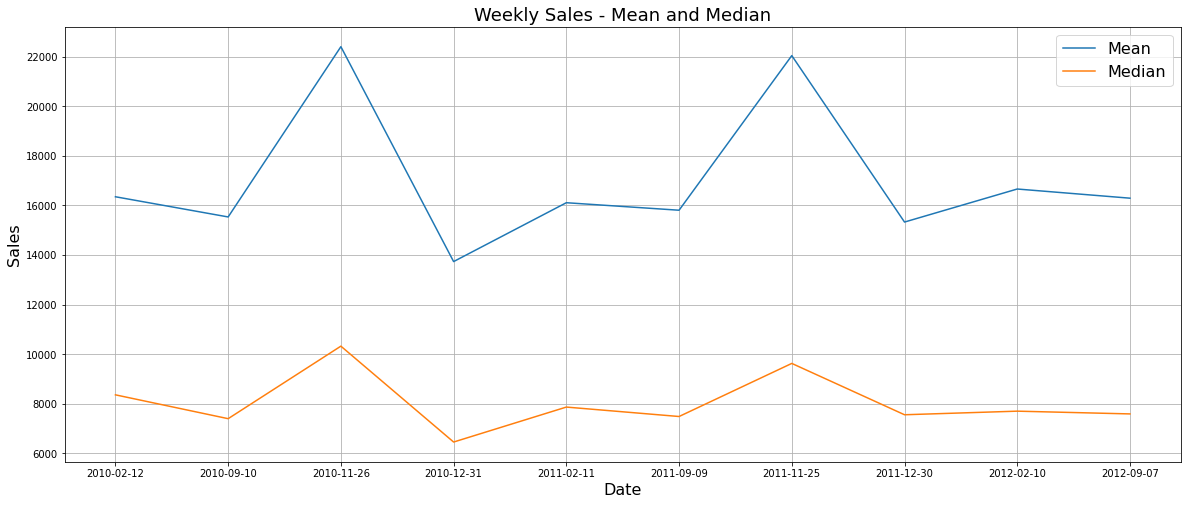

In [ ]:
weekly_sales_mean = df_train['Weekly_Sales'].groupby(df_train['Date']).mean()
weekly_sales_median = df_train['Weekly_Sales'].groupby(df_train['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


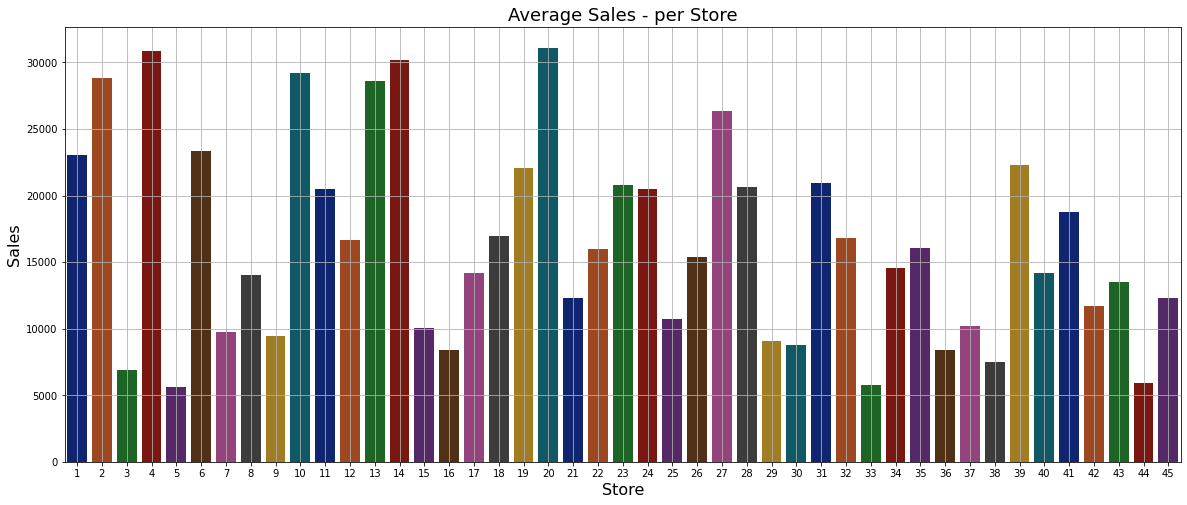

In [ ]:
weekly_sales = df_train['Weekly_Sales'].groupby(df_train['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

**Stores 4 and 20 are the most popular**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


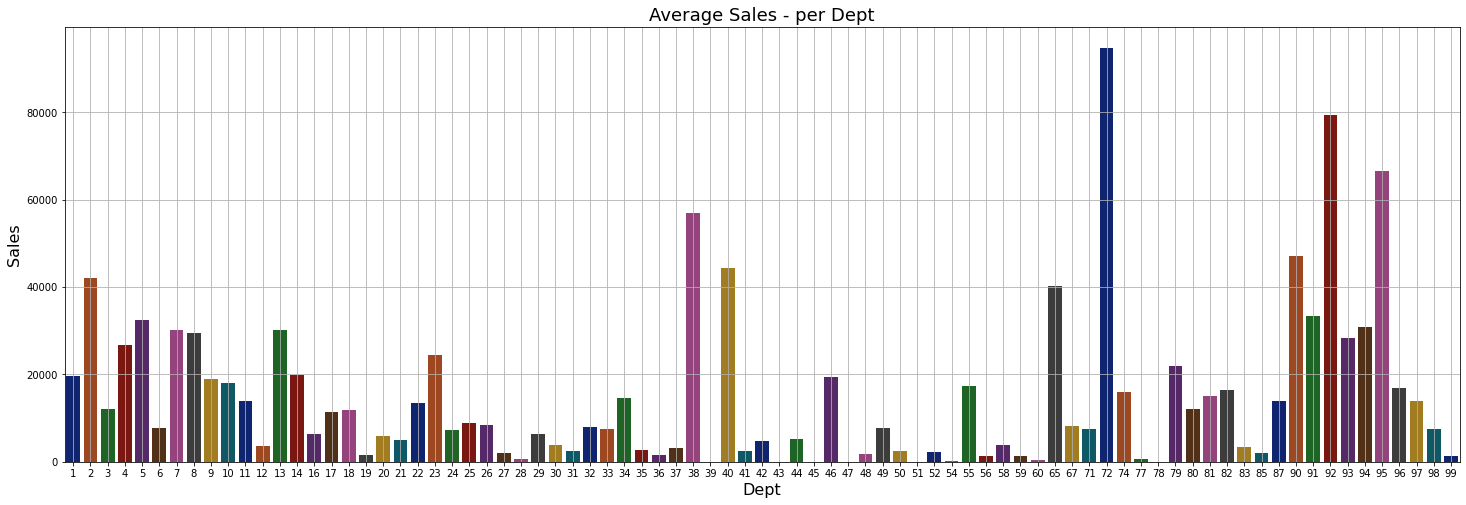

In [ ]:
weekly_sales = df_train['Weekly_Sales'].groupby(df_train['Dept']).mean()
plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

**Dept 72 is the most popular**

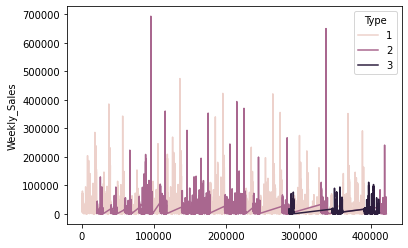

In [ ]:
sns.lineplot(x = df_train.index, y = "Weekly_Sales", hue = "Type", data = df_train)

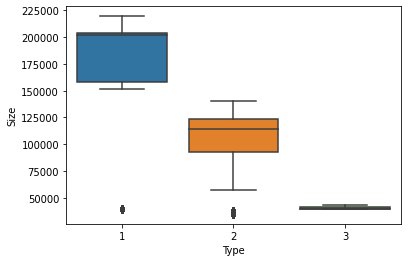

In [ ]:
sns.boxplot(x = "Type", y = "Size", data = df_train);

Type 1 store is the most popular

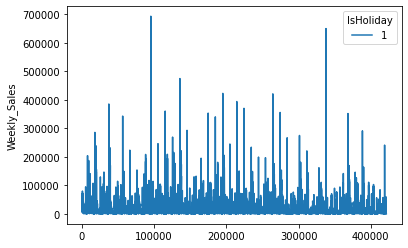

In [ ]:
sns.lineplot(x = df_train.month.index, y = "Weekly_Sales", hue = "IsHoliday", data = df_train);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


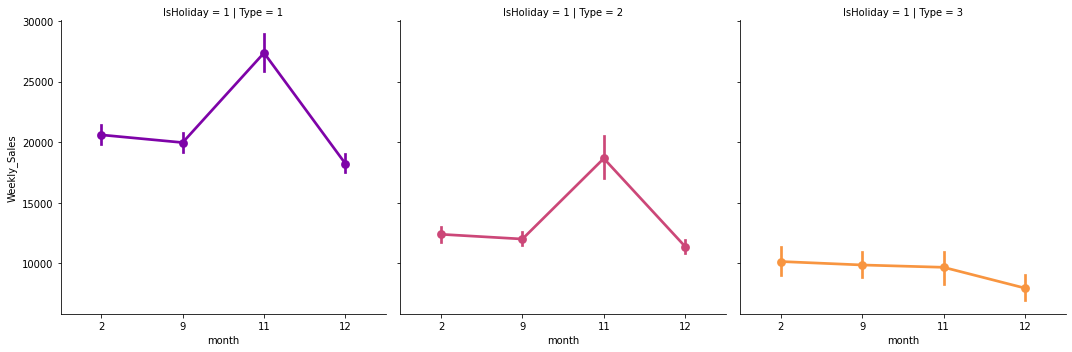

In [ ]:
# sales trends
sns.factorplot(data = df_train, x = 'month', y = "Weekly_Sales", 
               col = 'Type', # per store type in cols
               palette = 'plasma',
               hue = 'Type',
               row = 'IsHoliday')

**Type 1 has the highest weekly sales as compared to all other store types. Type 1 and Type 2 stors have the highest sales in November.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


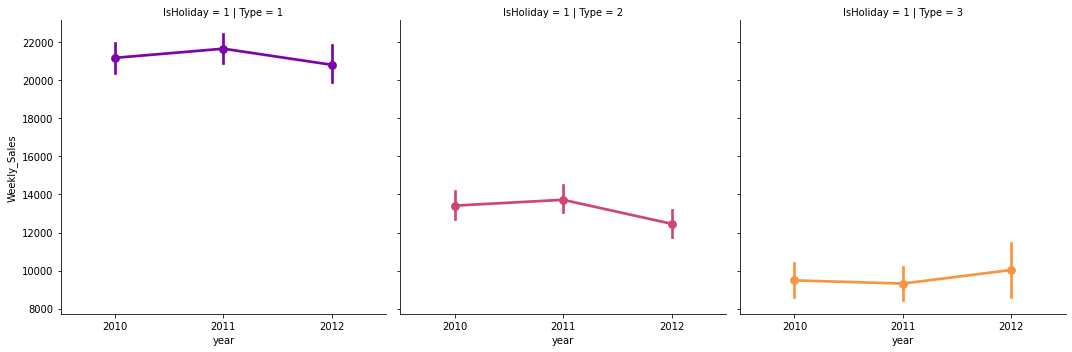

In [ ]:
# sales trends
sns.factorplot(data = df_train, x = 'year', y = "Weekly_Sales", 
               col = 'Type', # per store type in cols
               palette = 'plasma',
               hue = 'Type',
               row = 'IsHoliday')

**Type 1 has the highest weekly sales as compared to all other store types. Type 1 and Type 2 stors have the highest sales in 2011.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


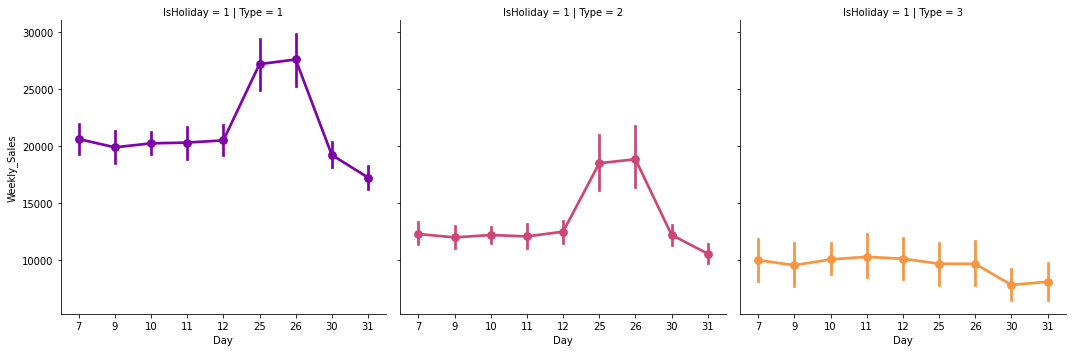

In [ ]:
# sales trends
sns.factorplot(data = df_train, x = 'Day', y = "Weekly_Sales", 
               col = 'Type', # per store type in cols
               palette = 'plasma',
               hue = 'Type',
               row = 'IsHoliday')

**Type 1 has the highest weekly sales as compared to all other store types. Type 1 and Type 2 stors have the highest sales on the 25th and 26th of the month.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


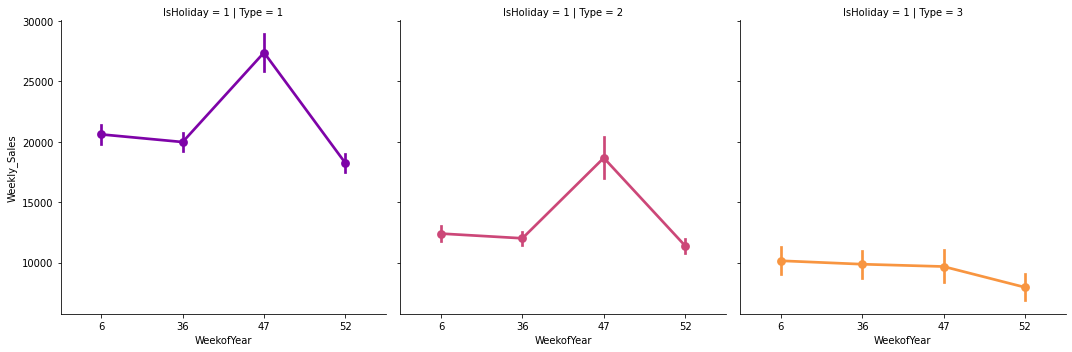

In [ ]:
# sales trends
sns.factorplot(data = df_train, x = 'WeekofYear', y = "Weekly_Sales", 
               col = 'Type', # per store type in cols
               palette = 'plasma',
               hue = 'Type',
               row = 'IsHoliday')

**Type 1 has the highest weekly sales as compared to all other store types. Type 1 and Type 2 stors have the highest sales in the 47th week.**

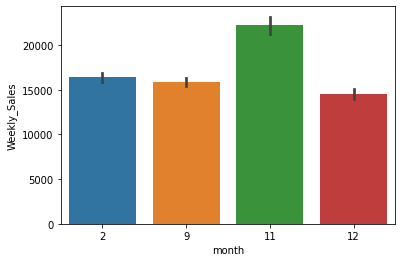

In [ ]:
sns.barplot(x='month',y='Weekly_Sales',data = df_train)

**Sales peak in novemeber and dip in december**

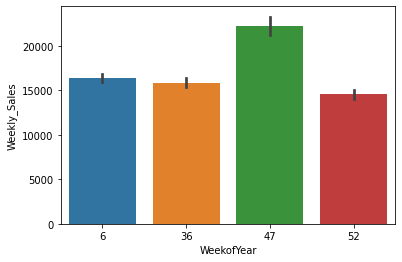

In [ ]:
sns.barplot(x='WeekofYear',y='Weekly_Sales',data = df_train)

**Sales peak in november for christmas shopping and dip in december**

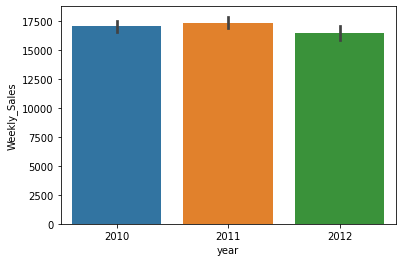

In [ ]:
sns.barplot(x='year',y='Weekly_Sales',data = df_train)

**2010 and 2011 were strnger than 2012**

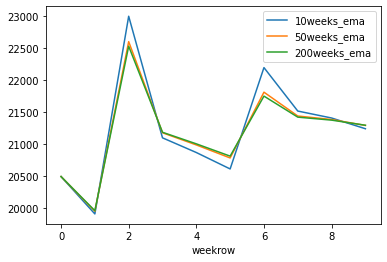

In [ ]:
#6.1 Exponential Moving Average chart of Sales figure
#The number of preceding values included in the moving average is called the span of the moving average.
wallmart_a = df_train.loc[df_train['Type'] == 1]
wallmart_weekly = wallmart_a.groupby(['year','WeekofYear'],as_index = False)

wallmart_weekly = wallmart_weekly.agg({'Weekly_Sales':np.mean})
wallmart_weekly = wallmart_weekly.sort_values(by = ['year','WeekofYear'])
wallmart_weekly['weekrow']= wallmart_weekly.reset_index().index

wallmart_weekly['10weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=10).mean()
wallmart_weekly['50weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=50).mean()
wallmart_weekly['200weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=200).mean()
wallmart_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

**STORETYPE A - While analysing Exponential Moving Average Chart of Store Type A we observe that -Store type A sales figure in slight uptrend 10 days EMA never crosses 200 days EMA. -We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 2 and week 6-7.**

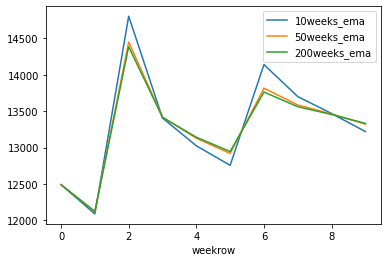

In [ ]:
#6.1 Exponential Moving Average chart of Sales figure
#The number of preceding values included in the moving average is called the span of the moving average.
wallmart_b = df_train.loc[df_train['Type'] == 2]
wallmart_weekly = wallmart_b.groupby(['year','WeekofYear'],as_index = False)

wallmart_weekly = wallmart_weekly.agg({'Weekly_Sales':np.mean})
wallmart_weekly = wallmart_weekly.sort_values(by = ['year','WeekofYear'])
wallmart_weekly['weekrow']= wallmart_weekly.reset_index().index

wallmart_weekly['10weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=10).mean()
wallmart_weekly['50weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=50).mean()
wallmart_weekly['200weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=200).mean()
wallmart_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

STORETYPE B - While analysing Exponential Moving Average Chart of Store Type B we observe that

Storetype B Sales figures are in strong uptrend and 120 days EMA never crosses 200 days EMA sales chart of Storetype B is very strong.
Although this chart is very strong we observe seasonality in upward seasonality at week 2 and week 6-7. **bold text**

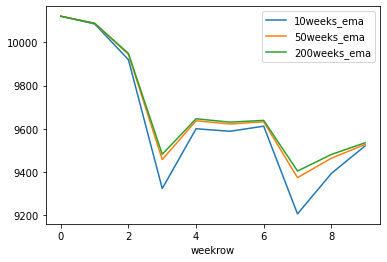

In [ ]:
#6.1 Exponential Moving Average chart of Sales figure
#The number of preceding values included in the moving average is called the span of the moving average.
wallmart_c = df_train.loc[df_train['Type'] == 3]
wallmart_weekly = wallmart_c.groupby(['year','WeekofYear'],as_index = False)

wallmart_weekly = wallmart_weekly.agg({'Weekly_Sales':np.mean})
wallmart_weekly = wallmart_weekly.sort_values(by = ['year','WeekofYear'])
wallmart_weekly['weekrow']= wallmart_weekly.reset_index().index

wallmart_weekly['10weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=10).mean()
wallmart_weekly['50weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=50).mean()
wallmart_weekly['200weeks_ema'] = wallmart_weekly.Weekly_Sales.ewm(span=200).mean()
wallmart_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

STORETYPE C - While analysing Exponential Moving Average Chart of Store Type c we observe that

Storetype B Sales figures are in strong uptrend and 200 days EMA never crosses 50 days EMA sales chart of Storetype B is very strong.
Although this chart is very strong we observe seasonality in upward seasonality at week 0. **bold text**

In [ ]:
# preparation: input should be float type
df_train['Weekly_Sales'] = df_train['Weekly_Sales'] * 1.0

# store types
sales_a = df_train[df_train.Type == 1]['Weekly_Sales']
sales_b = df_train[df_train.Type == 2]['Weekly_Sales']
sales_c = df_train[df_train.Type == 3]['Weekly_Sales']

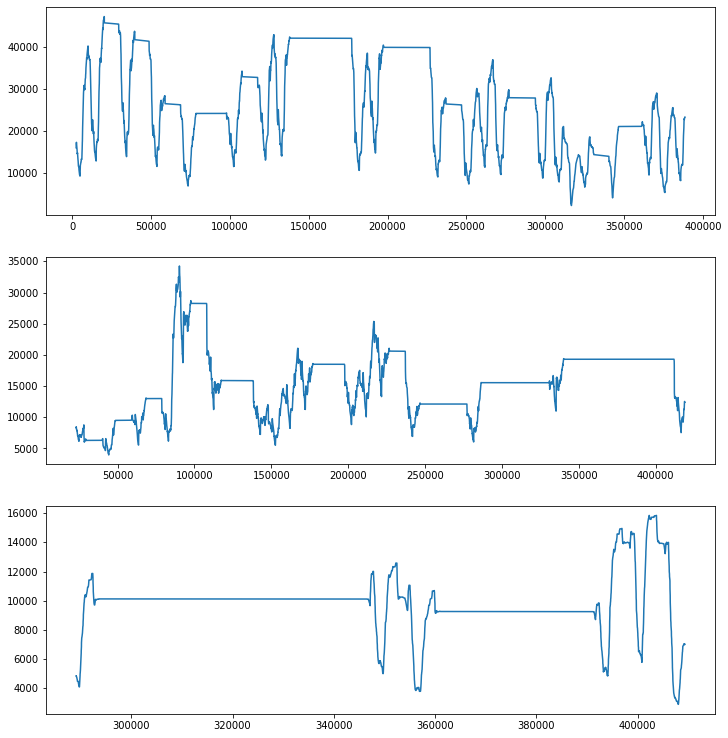

In [ ]:
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot( ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot( ax = ax3)


**Type 3 sales are increasing unlike Type 1 and Type 2 stores.**

AUTOCORRELATION

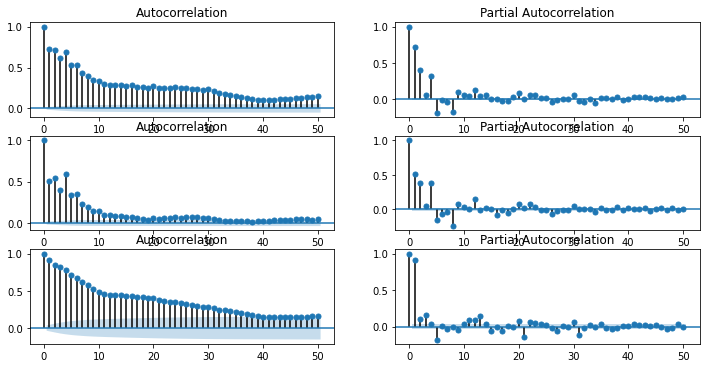

In [ ]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca())
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca())

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca())
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca())

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca())
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca())

plt.show()

For store 1, store 2 and store 3 it seems like each observation is coorrelated to its adjacent observations.

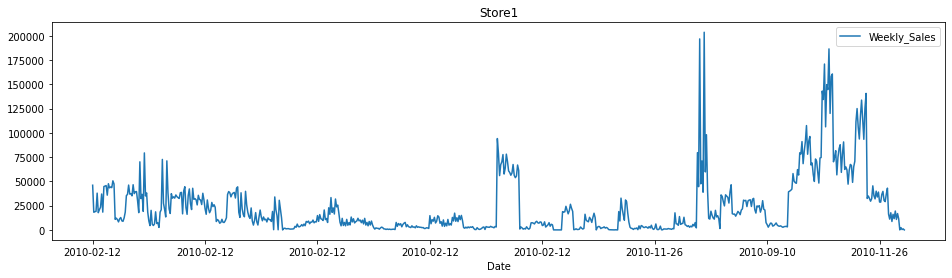

In [ ]:
# sales of store1 full timne
strain = df_train[df_train.Weekly_Sales>0]
strain.loc[strain['Store']==1 ,['Date','Weekly_Sales']].plot(x='Date',y='Weekly_Sales',title='Store1',figsize=(16,4))

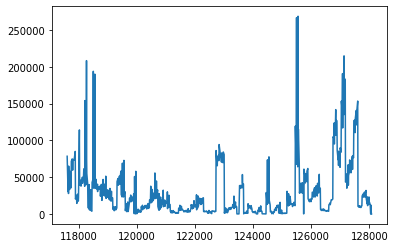

In [ ]:
df_train[df_train.Store == 13]['Weekly_Sales'].plot()

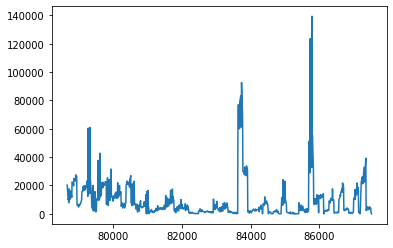

In [ ]:
df_train[df_train.Store == 9]['Weekly_Sales'].plot()

https://www.kaggle.com/elenapetrova/time-series-analysis-and-forecasts-with-prophet

# ***CORRELATION PLOTS***

In [ ]:
df_train.corr()

,Store,Dept,Weekly_Sales,IsHoliday,year,month,WeekofYear,Day,DayofWeek,Type,Size
Store,1.000000,0.024100,-0.081434,NaN,0.003034,0.001751,0.001630,-0.000834,NaN,0.223914,-0.180166
Dept,0.024100,1.000000,0.133825,NaN,0.005374,0.000128,0.000250,0.001276,NaN,0.001971,-0.001799
Weekly_Sales,-0.081434,0.133825,1.000000,NaN,-0.004897,0.017993,0.018896,0.023960,NaN,-0.161962,0.216988
IsHoliday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.003034,0.005374,-0.004897,NaN,1.000000,-0.240144,-0.250843,-0.406128,NaN,0.003211,-0.004149
month,0.001751,0.000128,0.017993,NaN,-0.240144,1.000000,0.998683,0.662448,NaN,0.000904,-0.002434
WeekofYear,0.001630,0.000250,0.018896,NaN,-0.250843,0.998683,1.000000,0.699690,NaN,0.000939,-0.002471
Day,-0.000834,0.001276,0.023960,NaN,-0.406128,0.662448,0.699690,1.000000,NaN,0.000727,-0.001703
DayofWeek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,0.223914,0.001971,-0.161962,NaN,0.003211,0.000904,0.000939,0.000727,NaN,1.000000,-0.811466


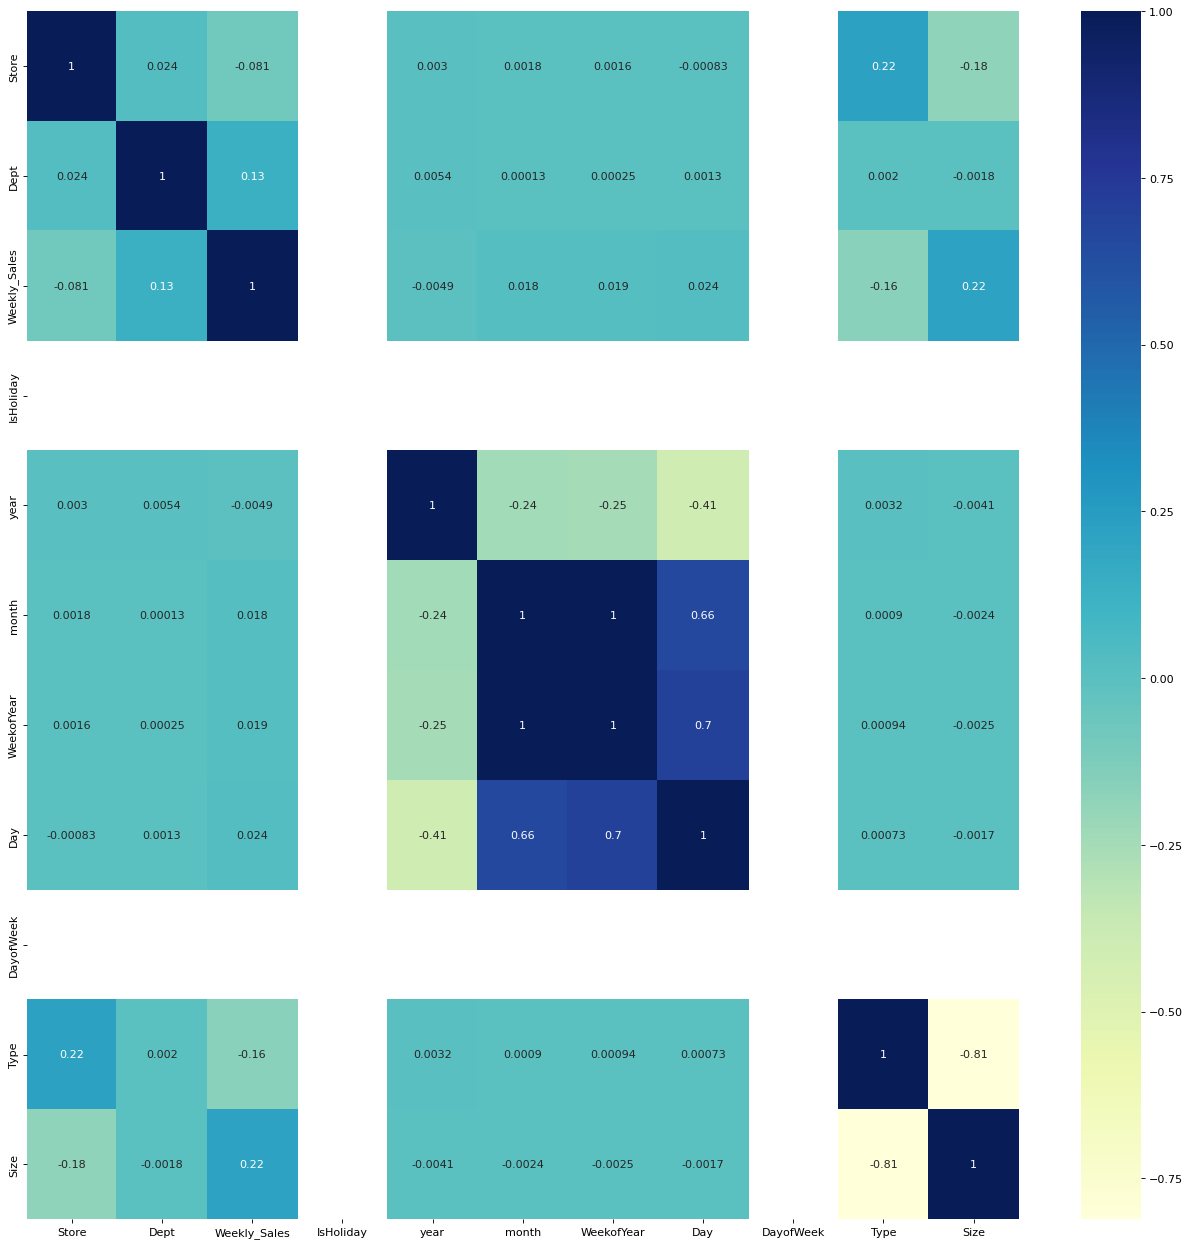

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20, 20), dpi=80)


# plotting correlation heatmap
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
  


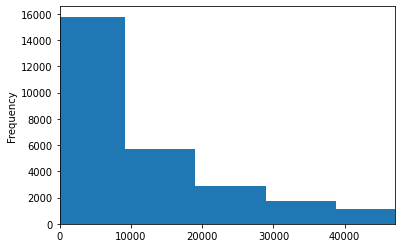

In [ ]:

df_train["Weekly_Sales"].plot(kind='hist',bins=70,xlim=(0,47000))

# ***Time Series Analysis and Forecasting with Prophet***

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
df_train['IsHoliday'].value_counts()

1    29661
Name: IsHoliday, dtype: int64

In [ ]:
# sales for the store number 1 (StoreType C)
sales = df_train.loc[:, ['Date', 'Weekly_Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [ ]:
# from the prophet documentation every variables should have specific names
#SALES VS DATE
sales = sales.rename(columns = {'Date': 'ds',
                                'Weekly_Sales': 'y'})
sales.head()

,ds,y
421562,2012-09-07,352.44
421532,2012-02-10,770.86
421526,2011-12-30,553.21
421521,2011-11-25,794.62
421510,2011-09-09,1092.66


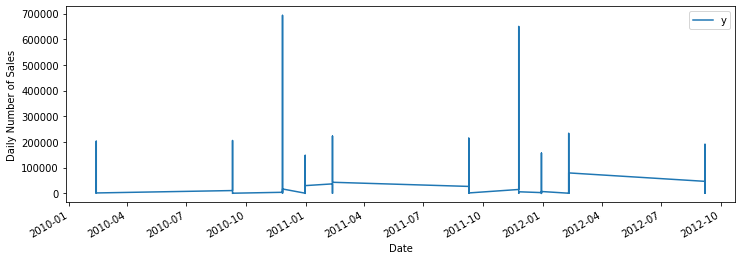

In [ ]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

**The Weekly Sales peak right during Christmas.**

In [ ]:
df_test['Date']

0         2012-11-02
1         2012-11-09
2         2012-11-16
3         2012-11-23
4         2012-11-30
             ...    
115059    2013-06-28
115060    2013-07-05
115061    2013-07-12
115062    2013-07-19
115063    2013-07-26
Name: Date, Length: 115064, dtype: object

In [ ]:
# prophet by Facebook
from fbprophet import Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95)
my_model.fit(sales)

#future dates
# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 50*7)

print("First week to forecast.")
future_dates

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


First week to forecast.


,ds
0,2010-02-12
1,2010-09-10
2,2010-11-26
3,2010-12-31
4,2011-02-11
...,...
355,2013-08-19
356,2013-08-20
357,2013-08-21
358,2013-08-22


In [ ]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
353,2013-08-17,45817.491964,-5311.435432,97340.116426
354,2013-08-18,45894.784723,-5052.739081,99996.905937
355,2013-08-19,45772.150633,-8394.245681,96729.253559
356,2013-08-20,45432.705093,-6250.763308,98602.817874
357,2013-08-21,44864.679638,-8177.425169,96564.514633
358,2013-08-22,44061.979533,-10235.412163,96171.285956
359,2013-08-23,43024.596261,-5175.137969,99502.913530


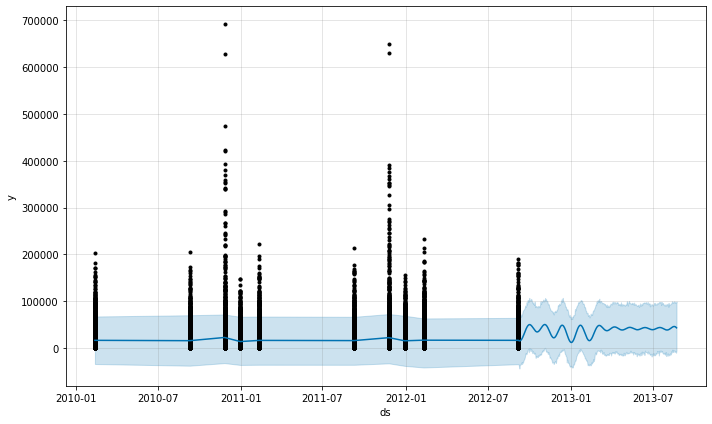

In [ ]:
# visualizing predicions
my_model.plot(forecast);

As we see Prophet catches the trends and most of the time gets future values right.


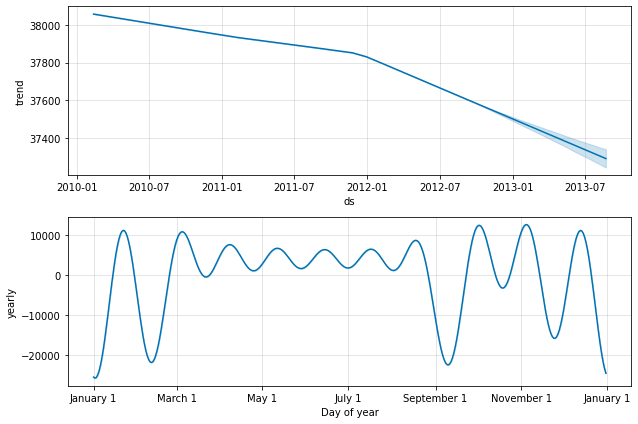

In [ ]:
my_model.plot_components(forecast);

The first plot shows that the weekly sales have been linearly decreasing over time 

The second plot shows that the most buzy season occurs during the Christmas holidays.

# ***CLEANING DATA***

In [ ]:
# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
#train = df.sort_values(['Date'],ascending = False)

split_index = int(0.2*29661)
valid = df_train[:split_index] 
train = df_train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Weekly_Sales>0)]
train = train[(train.Weekly_Sales>0)]


In [ ]:
len(train)

23641

In [ ]:
train=train.drop(['Date'], axis=1)
valid=valid.drop(['Date'], axis=1)
df_test=df_test.drop(['Date'], axis=1)

In [ ]:
# select the features we need
def process(data, isTest = False):
    features = ['Store', 'Dept', 'year', 'month', 'Day','WeekofYear', 'DayofWeek', 'Type', 'Size']  
    if not isTest:
        features.append('Weekly_Sales')
        
    data = data[features]
    return data

In [ ]:
train = process(train)
valid = process(valid)
df_test = process(df_test,isTest = True)

In [ ]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)


# split x and y
x_train, y_train = train.drop(columns = ['Weekly_Sales']), np.log1p(train['Weekly_Sales']) #why? ask
x_valid, y_valid = valid.drop(columns = ['Weekly_Sales']), np.log1p(valid['Weekly_Sales'])


In [ ]:
x_train

,Store,Dept,year,month,Day,WeekofYear,DayofWeek,Type,Size
84049,9,41,2012,9,7,36,4,2,125833
84058,9,42,2010,2,12,6,4,2,125833
84088,9,42,2010,9,10,36,4,2,125833
84099,9,42,2010,11,26,47,4,2,125833
84104,9,42,2010,12,31,52,4,2,125833
...,...,...,...,...,...,...,...,...,...
421510,45,98,2011,9,9,36,4,2,118221
421521,45,98,2011,11,25,47,4,2,118221
421526,45,98,2011,12,30,52,4,2,118221
421532,45,98,2012,2,10,6,4,2,118221


In [ ]:
y_train

84049     7.671831
84058     7.900929
84088     8.132727
84099     7.997902
84104     7.899239
            ...   
421510    6.997285
421521    6.679122
421526    6.317544
421532    6.648803
421562    5.867714
Name: Weekly_Sales, Length: 23641, dtype: float64

In [ ]:
df_test

,Store,Dept,year,month,Day,WeekofYear,DayofWeek,Type,Size
0,1,1,2012,11,2,44,4,1,151315
1,1,1,2012,11,9,45,4,1,151315
2,1,1,2012,11,16,46,4,1,151315
3,1,1,2012,11,23,47,4,1,151315
4,1,1,2012,11,30,48,4,1,151315
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013,6,28,26,4,2,118221
115060,45,98,2013,7,5,27,4,2,118221
115061,45,98,2013,7,12,28,4,2,118221
115062,45,98,2013,7,19,29,4,2,118221


# ***RANDOM FOREST***

In [ ]:
# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label()) #why
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [ ]:
x_train.fillna(value = 0, inplace = True)
x_valid.fillna(value = 0, inplace = True)


In [ ]:
# try random forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred)) #why ask
print('RMSPE: {:.4f}'.format(error))

RMSPE: 71.5552


In [ ]:
y_pred = clf.predict(df_test)
y_pred

array([10.35703241, 10.34428656, 10.38425136, ...,  6.29521363,
        6.49171261,  6.35153454])

# ***XGBOOST***

In [ ]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train) #why ask
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:8.04887	eval-rmse:8.15286	train-rmspe:1.14384	eval-rmspe:1.02246
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.81339	eval-rmse:7.91427	train-rmspe:1.16217	eval-rmspe:1.02858
[2]	train-rmse:7.59248	eval-rmse:7.69495	train-rmspe:1.39114	eval-rmspe:1.07934
[3]	train-rmse:7.36854	eval-rmse:7.47127	train-rmspe:1.54856	eval-rmspe:1.08275
[4]	train-rmse:7.15153	eval-rmse:7.25327	train-rmspe:1.74642	eval-rmspe:1.08656
[5]	train-rmse:6.95007	eval-rmse:7.05434	train-rmspe:2.20839	eval-rmspe:1.17172
[6]	train-rmse:6.74591	eval-rmse:6.85863	train-rmspe:2.54373	eval-rmspe:1.19954
[7]	train-rmse:6.55674	eval-rmse:6.67274	train-rmspe:3.20271	eval-rmspe:1.33618
[8]	train-rmse:6.37386	eval-rmse:6.49287	train-rmspe:3.99751	eval-rmspe:1.52303
[9]	train-rmse:6.18649	eval-rmse:6.3147	train-rmspe:4.59383	eval-rmspe:1.53221
[10]	train-rmse:6.00506	eval-rmse:6.13298	train-rmspe:4

In [ ]:
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 26.9421


In [ ]:
y_pred = model.predict(xgb.DMatrix(df_test))
y_pred

array([9.202307 , 9.193866 , 9.222094 , ..., 5.991607 , 6.076807 ,
       5.8510427], dtype=float32)

In [ ]:
df_test

,Store,Dept,year,month,Day,WeekofYear,DayofWeek,Type,Size
0,1,1,2012,11,2,44,4,1,151315
1,1,1,2012,11,9,45,4,1,151315
2,1,1,2012,11,16,46,4,1,151315
3,1,1,2012,11,23,47,4,1,151315
4,1,1,2012,11,30,48,4,1,151315
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013,6,28,26,4,2,118221
115060,45,98,2013,7,5,27,4,2,118221
115061,45,98,2013,7,12,28,4,2,118221
115062,45,98,2013,7,19,29,4,2,118221


In [ ]:
res =  x_valid.copy()
res['Prediction']=y_pred
res = pd.merge(y_valid,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Weekly_Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Weekly_Sales/res.Prediction
res.head()

,Weekly_Sales,Store,Dept,year,month,Day,WeekofYear,DayofWeek,Type,Size,Prediction,Ratio,Error,Weight
1,10.737277,1,1,2010,2,12,6,4,1,151315,9.451276,0.880230,0.119770,1.136066
31,9.808943,1,1,2010,9,10,36,4,1,151315,9.154608,0.933292,0.066708,1.071476
42,9.842744,1,1,2010,11,26,47,4,1,151315,9.280087,0.942835,0.057165,1.060631
47,9.858782,1,1,2010,12,31,52,4,1,151315,9.089790,0.921999,0.078001,1.084599
53,10.542394,1,1,2011,2,11,6,4,1,151315,9.420665,0.893598,0.106402,1.119071


Mean Ratio of predition and real sales data is 0.9662120296775489: store all
Mean Ratio of predition and real sales data is 0.9790897533058576: store 1


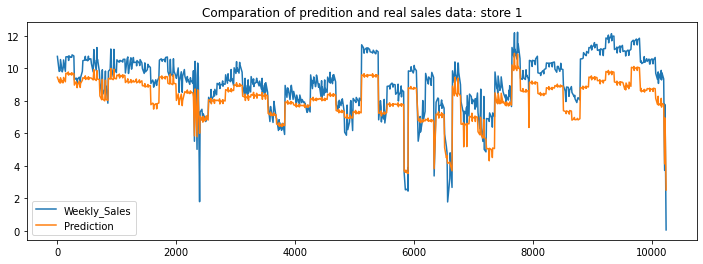

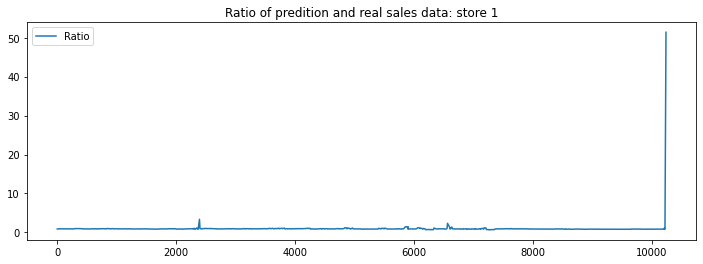

In [ ]:
col_1 = ['Weekly_Sales','Prediction']
col_2 = ['Ratio']
L=np.random.randint( low=1,high = 3, size = 1 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(res.Ratio.mean()))
for i in L:
    
    s1 = pd.DataFrame(res[res['Store']==i],columns = col_1)
    s2 = pd.DataFrame(res[res['Store']==i],columns = col_2)
    s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(i),figsize=(12,4))
    s2.plot(title = 'Ratio of predition and real sales data: store {}'.format(i),figsize=(12,4))
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))

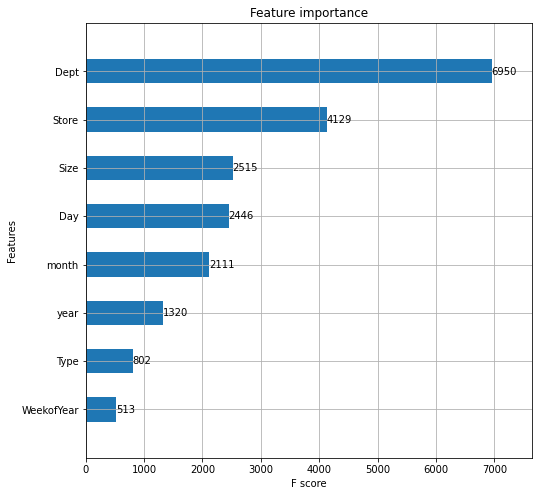

In [ ]:
# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

# ***ARIMA***

In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
 exogenous= x_train,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72478.133, Time=54.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74292.164, Time=35.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72858.826, Time=26.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72493.464, Time=39.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74334.299, Time=101.15 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1784: RuntimeWarning: divide by zero encountered in reciprocal
  ordered from lowest degree to highest. Initialized with ones, unless


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=74419.591, Time=37.91 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=72517.789, Time=38.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=72352.215, Time=35.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=72269.068, Time=42.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=72039.307, Time=44.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72035.651, Time=45.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72289.672, Time=37.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=71986.907, Time=47.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=71990.841, Time=42.66 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=74465.911, Time=52.53 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1784: RuntimeWarning: divide by zero encountered in reciprocal
  ordered from lowest degree to highest. Initialized with ones, unless


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=74465.646, Time=58.35 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=72100.199, Time=52.75 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1784: RuntimeWarning: divide by zero encountered in reciprocal
  ordered from lowest degree to highest. Initialized with ones, unless


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=74443.060, Time=50.69 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=74523.013, Time=53.13 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=72077.937, Time=46.15 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Total fit time: 941.265 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                23641
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -35976.454
Date:                Tue, 08 Feb 2022   AIC                          71986.907
Time:                        03:56:44   BIC                          72124.109
Sample:                             0   HQIC                         72031.434
                              - 23641                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0739      0.016     -4.478      0.000      -0.106      -0.042
Store         31.0981      0.736     42.257      0.000      29.656      32.540
Dept           0.2538      0.007     34.366      0.000       0.239       0.268
year          -0.5193      0.036    -14.468      0.000      -0.590      -0.449
month        -16.1777      0.824    -19.625      0.000     -17.793     -14.562
Day           -0.5289      0.027    -19.522      0.000      -0.582      -0.476
WeekofYear     3.7316      0.190     19.615      0.000       3.359       4.104
DayofWeek    1.05e-17   1.02e-09   1.03e-08      1.000   -1.99e-09    1.99e-09
Type           0.2280      0.101      2.267      0.023       0.031       0.425
Size       -3.695e-06    1.8e-06     -2.056      0.040   -7.22e-06   -1.73e-07
ar.L1         -0.7243      0.050    -14.365      0.000      -0.823      -0.625
ar.L2         -0.3190      0.042     -7.560      0.000      -0.402      -0.236
ar.L3         -0.1083      0.025     -4.350      0.000      -0.157      -0.059
ma.L1          0.4464      0.050      8.867      0.000       0.348       0.545
ma.L2          0.0482      0.037      1.307      0.191      -0.024       0.121
ma.L3         -0.1015      0.035     -2.917      0.004      -0.170      -0.033
sigma2         1.2302      0.005    265.399      0.000       1.221       1.239
===================================================================================
Ljung-Box (Q):                     1146.65   Jarque-Bera (JB):            198698.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.45
Prob(H) (two-sided):                  0.64   Kurtosis:                        17.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+21. Standard errors may be unstable.
"""

# ***SARIMA***

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(y_train, seasonal_order=(0,1,0,52),
 exog=x_train,
 order=(0,1,0),
 enforce_invertibility=False, enforce_stationarity=False)

results= model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                23641
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood              -45151.639
Date:                            Tue, 08 Feb 2022   AIC                          90323.277
Time:                                    05:45:55   BIC                          90403.962
Sample:                                         0   HQIC                         90349.465
                                          - 23641                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Store         43.1161      1.024     42.088      0.000      41.108      45.124
Dept           0.3817      0.010     37.103      0.000       0.362       0.402
year          -0.3298      0.033    -10.069      0.000      -0.394      -0.266
month        -12.7988      0.714    -17.930      0.000     -14.198     -11.400
Day           -0.4197      0.024    -17.812      0.000      -0.466      -0.373
WeekofYear     2.9550      0.165     17.941      0.000       2.632       3.278
DayofWeek  -9.358e-14        nan        nan        nan         nan         nan
Type           0.2756      0.144      1.916      0.055      -0.006       0.558
Size       -9.304e-06    2.1e-06     -4.439      0.000   -1.34e-05    -5.2e-06
sigma2         2.6936      0.012    226.221      0.000       2.670       2.717
===================================================================================
Ljung-Box (Q):                     2891.52   Jarque-Bera (JB):             56109.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.01
Prob(H) (two-sided):                  0.32   Kurtosis:                        10.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.75e+22. Standard errors may be unstable.
"""